## Steps
* Exploratory Data Analysis
* Feature Engineering
* Preprocessing
* Model Building

In [20]:
# import required libraries
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\i\Downloads\dataset.csv")

In [3]:
df.shape

(43400, 12)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [39]:
df['smoking_status'].fillna('Unknown', inplace=True)

In [41]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [9]:
df['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [40]:
df['smoking_status'].value_counts()

never smoked       16053
Unknown            13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [42]:
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

In [10]:
df['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [43]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [44]:
df1 = df.copy()

In [12]:
df['stroke'].value_counts(normalize = True)

0    0.981959
1    0.018041
Name: stroke, dtype: float64

In [23]:
LABELS = ["Stroke", "No Stroke"]

Text(0, 0.5, 'Frequency')

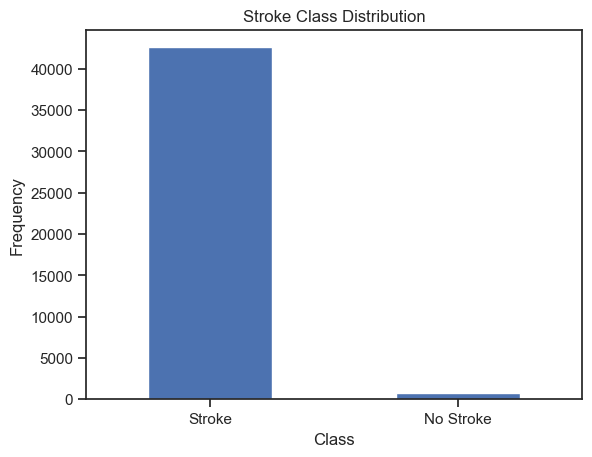

In [24]:
count_classes = pd.value_counts(df['stroke'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Stroke Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [89]:
#Create independent and Dependent Features
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["stroke",'id']]
# Store the variable we are predicting 
target = "stroke"
# Define a random state 
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(43400, 10)
(43400,)


In [141]:
correlation_matrix = df.corr()

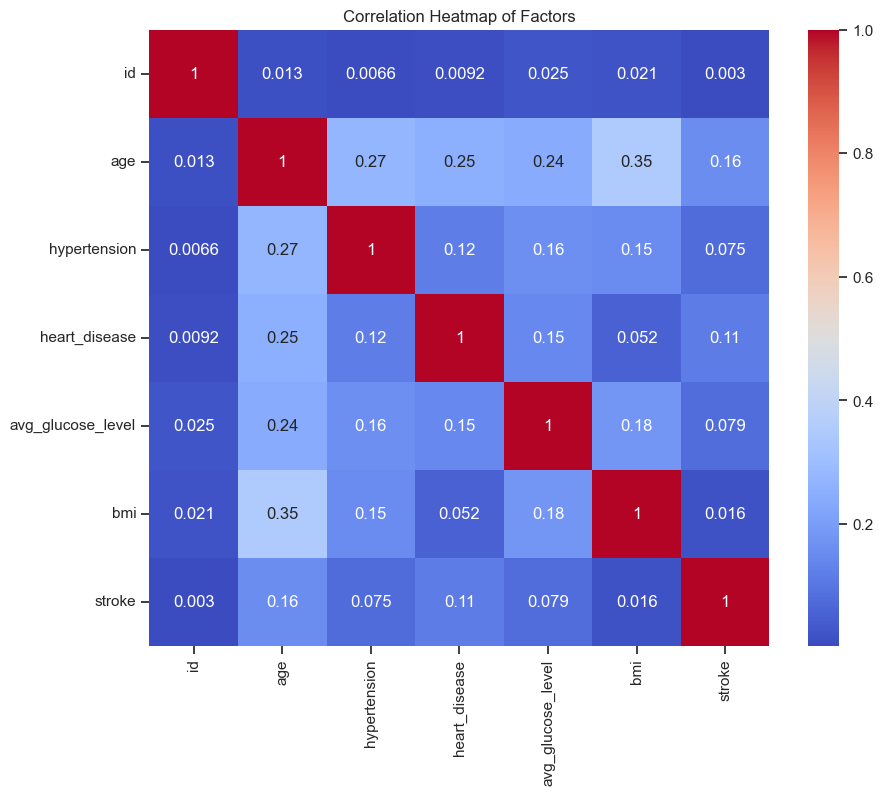

In [142]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Factors')
plt.show()

In [143]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

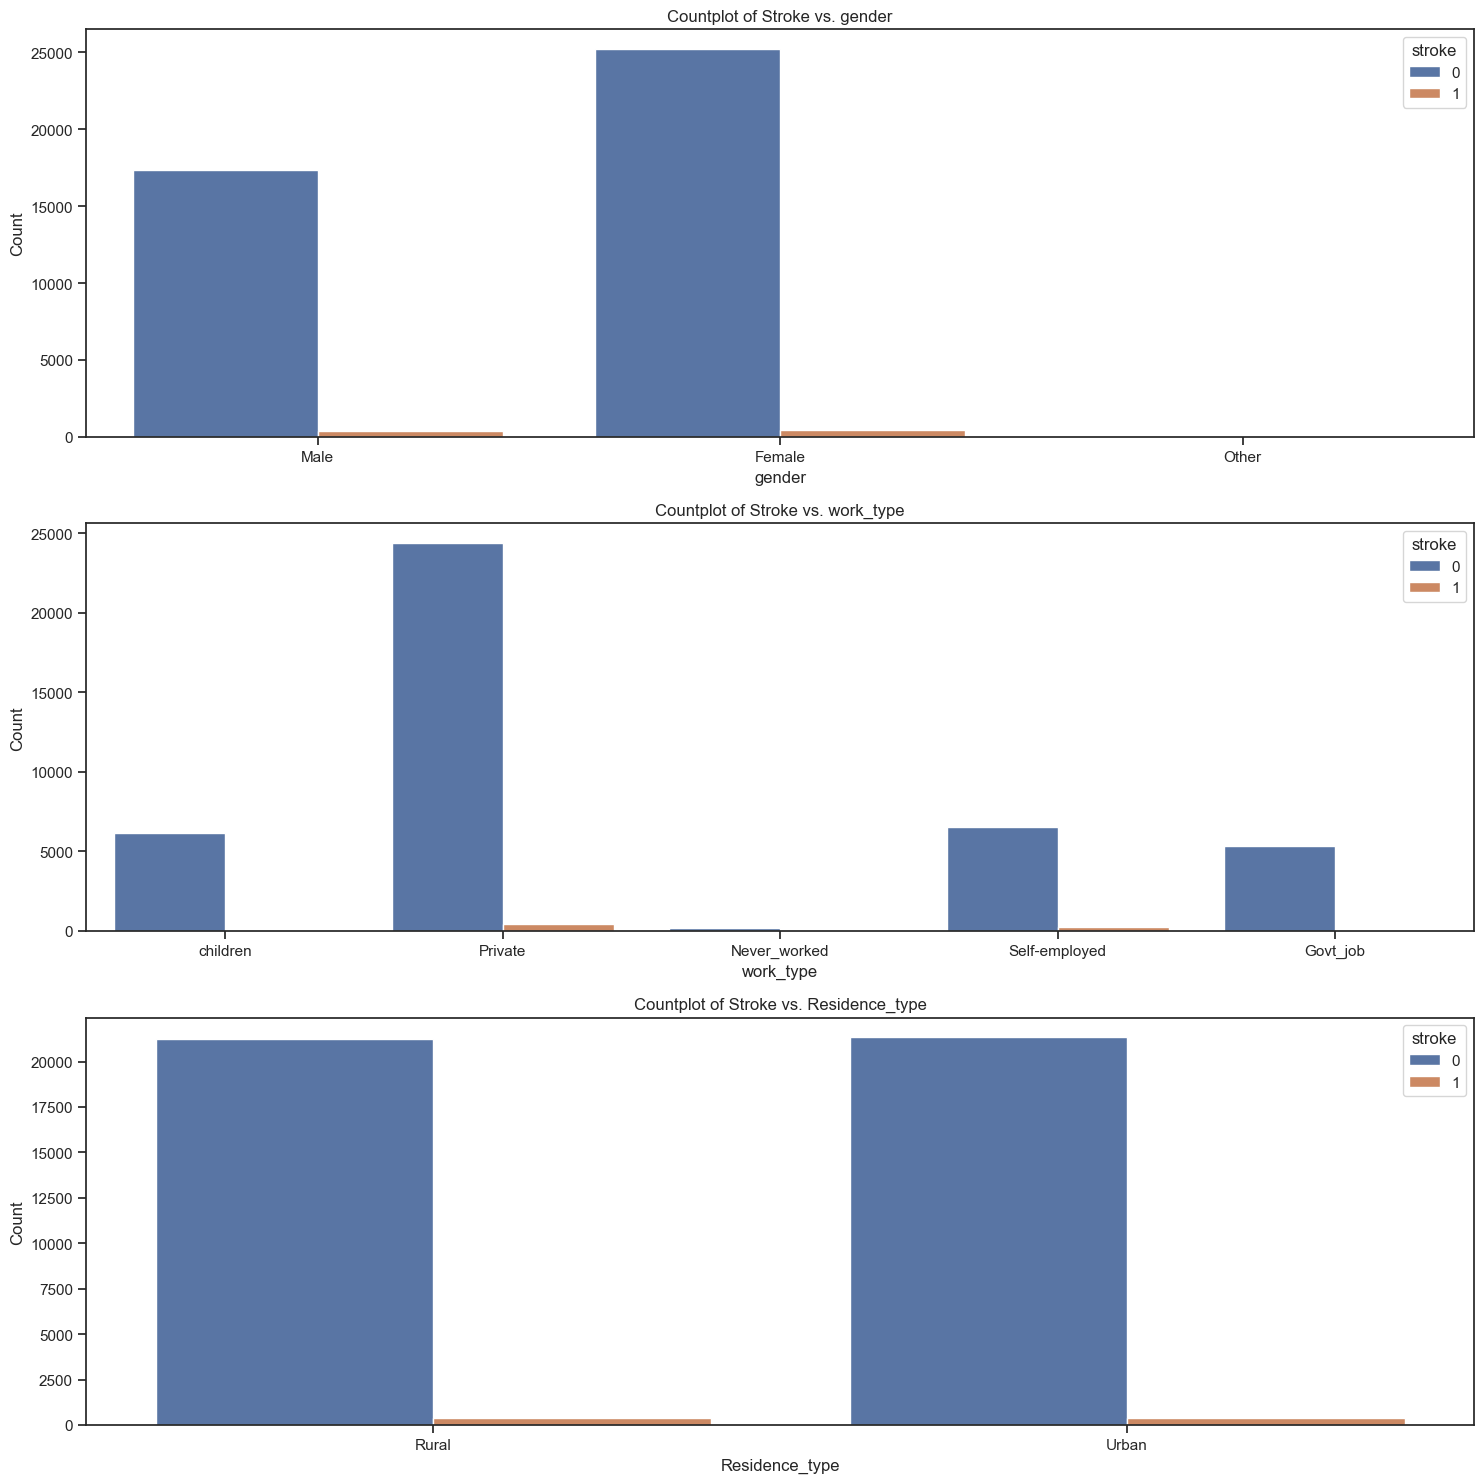

In [146]:
categorical_variables = ['gender', 'work_type', 'Residence_type']

fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(15, 5 * len(categorical_variables)))

for i, var in enumerate(categorical_variables):
    sns.countplot(data=df, x=var, hue='stroke', ax=axes[i])
    axes[i].set_title(f'Countplot of Stroke vs. {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [90]:
stroke = df1[df1['stroke']==1]

no_stroke = df1[df1['stroke']==0]

In [91]:
print(stroke.shape,no_stroke.shape)

(783, 12) (42617, 12)


In [92]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [93]:
df1['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [94]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown


In [95]:
X['smoking_status'].value_counts()

never smoked       16053
Unknown            13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [96]:
X.columns.to_list()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [97]:
X['ever_married'] = X['ever_married'].replace({'Yes': 1, 'No': 0})
X['work_type'] = X['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2,'Govt_job':3,'Never_worked': 4})

In [98]:
X['Residence_type'] = X['Residence_type'].replace({'Urban': 1, 'Rural': 0})

In [99]:
X['smoking_status'] = X['smoking_status'].replace({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2,'smokes':3})

In [100]:

X['gender'] = X['gender'].replace({'Male': 1, 'Female': 0, 'Other':2})

In [101]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,3.0,0,0,0,2,0,95.12,18.0,1
1,1,58.0,1,0,1,0,1,87.96,39.2,0
2,0,8.0,0,0,0,0,1,110.89,17.6,1
3,0,70.0,0,0,1,0,0,69.04,35.9,2
4,1,14.0,0,0,0,4,0,161.28,19.1,1


In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  int64  
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  int64  
 5   work_type          43400 non-null  int64  
 6   Residence_type     43400 non-null  int64  
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.3 MB


In [103]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 43400 entries, 0 to 43399
Series name: stroke
Non-Null Count  Dtype
--------------  -----
43400 non-null  int64
dtypes: int64(1)
memory usage: 339.2 KB


In [105]:
from imblearn.combine import SMOTETomek

# Create an instance of SMOTETomek
smk = SMOTETomek(random_state=42)

# Use the 'fit_resample' method to oversample and balance the dataset
X_res, y_res = smk.fit_resample(X, Y)


In [108]:
X_res.shape,y_res.shape

((85124, 10), (85124,))

In [107]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 42617, 1: 783})
Resampled dataset shape Counter({0: 42562, 1: 42562})


In [112]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.8,stratify = y_res,random_state = 2)

In [115]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])

In [116]:
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
             3: 'SGDClassifier', 4: 'DecisionTreeClassifier' }

In [117]:
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, sgd_pipline , dt_pipline ]

In [118]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, X_train, y_train, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.8018178087264222
RandomForestClassifier :  0.9699554726846152
KNeighborsClassifier :  0.9172381354124681
SGDClassifier :  0.8025520727188189
DecisionTreeClassifier :  0.9502342261440708


In [119]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    
    
    
]

In [120]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'accuracy', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [121]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [122]:
best_model.best_params_

{'classifier__n_estimators': 200,
 'classifier__max_features': 'auto',
 'classifier__criterion': 'entropy',
 'classifier': RandomForestClassifier(criterion='entropy', max_features='auto',
                        n_estimators=200)}

In [123]:
pipeline_rf = Pipeline([('scaler', StandardScaler()), 
                           ('Random Forest Calssifer', RandomForestClassifier(criterion='entropy', max_features='auto',
                        n_estimators=200))])

In [124]:
model = pipeline_rf.fit(X_train, y_train)

In [125]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

,actual,predicted
49775,1,1
82525,1,1
38241,0,0
61911,1,1
25995,0,0


In [126]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.tail(100)

,actual,predicted
60094,1,1
57019,1,1
40346,0,0
38215,0,0
76116,1,1
...,...,...
82677,1,1
9009,0,0
37345,0,0
60095,1,1


In [127]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  0.9748017621145374


In [128]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  1.0
ROC-AUC Score for validation dataset :  0.9748024830886685


In [129]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8513
           1       0.96      0.99      0.98      8512

    accuracy                           0.97     17025
   macro avg       0.98      0.97      0.97     17025
weighted avg       0.98      0.97      0.97     17025



<Axes: >

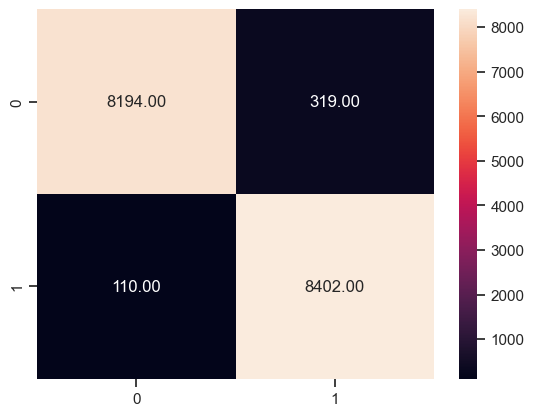

In [130]:
conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

## Predictive System

In [135]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,3.0,0,0,0,2,0,95.12,18.0,1
1,1,58.0,1,0,1,0,1,87.96,39.2,0
2,0,8.0,0,0,0,0,1,110.89,17.6,1
3,0,70.0,0,0,1,0,0,69.04,35.9,2
4,1,14.0,0,0,0,4,0,161.28,19.1,1


In [138]:
features = [1, 3.0,0,0,0,2,0,95.12,18.0,1]
#features = np.asarray(features)
#features= le.fit_transform(features)
features = np.array(features).reshape(1, -1)

In [139]:
prediction = model.predict(features)
print(prediction)

if (prediction[0] == 0):
    print('The Patient does not have Stroke')
else:
    print('The Patient has Stroke')

[0]
The Patient does not have Stroke


In [150]:
# Calculate correlations to identify factors contributing to stroke occurrence
correlations = df1.corr()
stroke_correlation = correlations['stroke'].drop('stroke') 

# The highest positive and negative correlations
highest_corr_factors = stroke_correlation.abs().nlargest(2)

print(f"Factors contributing to stroke occurrence: {highest_corr_factors.index.tolist()}")


Factors contributing to stroke occurrence: ['age', 'heart_disease']


In [153]:

# Select the categorical and numerical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Split data into features (X) and target (y)
X = df1.drop(columns=['stroke'])
y = df1['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data (in this case, no preprocessing needed)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Preprocess the data and train the model
clf.fit(X_train, y_train)

# Predict stroke occurrence
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

Accuracy: 0.9813364055299539
